In [1]:
pip install geopy # installing "geopy" library

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
cd '/content/drive/My Drive/Colab Notebooks/Coursera_Capstone' 

/content/drive/My Drive/Colab Notebooks/Coursera_Capstone


#### Reading the table containing Postal code, Borough, Neighborhood and coordinates

In [0]:
table_cords=pd.read_csv('table_cords.csv')

In [5]:
table_cords.head()

,Postal code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [6]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(table_cords['Borough'].unique()),
        table_cords.shape[0]
    )
)

The dataframe has 10 boroughs and 103 neighborhoods.


#### Checking a number of neighborhoods  in each borough

In [7]:
table_cords['Borough'].value_counts()

North York          24
Downtown Toronto    19
Scarborough         17
Etobicoke           12
Central Toronto      9
West Toronto         6
York                 5
East York            5
East Toronto         5
Mississauga          1
Name: Borough, dtype: int64

In [8]:
address = 'Toronto, ONT'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.678523999999996, -79.62912913064454.


##### Creating a map of Toronto with neighborhoods superimposed on top

In [9]:
# creating map of Toronto using latitude and longitude values
map_toronto=folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(table_cords['Latitude'], table_cords['Longitude'], table_cords['Borough'], table_cords['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [10]:
north_york_data=table_cords[table_cords['Borough']=='North York'].reset_index(drop=True)
north_york_data

,Postal code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
3,M3B,North York,Don Mills,43.745906,-79.352188
4,M6B,North York,Glencairn,43.709577,-79.445073
5,M3C,North York,Don Mills,43.725900,-79.340923
6,M2H,North York,Hillcrest Village,43.803762,-79.363452
7,M3H,North York,"Bathurst Manor, Wilson Heights, Downsview North",43.754328,-79.442259
8,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556
9,M3J,North York,"Northwood Park, York University",43.767980,-79.487262


In [11]:
address = 'North York, ONT'

geolocator_north = Nominatim(user_agent="ny_explorer")
location_north = geolocator_north.geocode(address)
latitude_north = location_north.latitude
longitude_north = location_north.longitude
print('The geograpical coordinate of North York are {}, {}.'.format(latitude_north, longitude_north))

The geograpical coordinate of North York are 43.5909589, -79.6461044.


#### Creating map of North York using latitude and longitude values

In [12]:
latitude_north=43.737120
longitude_north=-79.416137
map_north_york = folium.Map(location=[latitude_north, longitude_north], zoom_start=12)

# add markers to map
for lat, lng, label in zip(north_york_data['Latitude'], north_york_data['Longitude'], north_york_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_north_york)  
    
map_north_york

##### Define Foursquare credentials

In [13]:
#@title Cell with hidden Foursquare API credentials

CLIENT_ID = 'ZQYV3SALBRDLO3LH3MGHYHDORTGJUNA1TV2ZUQXY5GSIBPSQ' # your Foursquare ID
CLIENT_SECRET = 'DOO3TENJDCF0TGOXJ0SH1IANVWDQJYO5TO4KRS2WIDCXTL23' # your Foursquare Secret
VERSION = '20200417' # Foursquare API version

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)
print('Credentials OK')

Credentials OK


# Explore Neighborhoods in North York

In [0]:
LIMIT = 100
radius = 500

#### Function which getting top 100 venues that are in Toronto's neighborhoods within a radius of 500 meters from their centers.

In [0]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Creating a new dataframe called "north_york_venues"

In [16]:
north_york_venues = getNearbyVenues(names=north_york_data['Neighborhood'],
                                   latitudes=north_york_data['Latitude'],
                                   longitudes=north_york_data['Longitude']
                                  )

Parkwoods
Victoria Village
Lawrence Manor, Lawrence Heights
Don Mills
Glencairn
Don Mills
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Fairview, Henry Farm, Oriole
Northwood Park, York University
Bayview Village
Downsview
York Mills, Silver Hills
Downsview
North Park, Maple Leaf Park, Upwood Park
Humber Summit
Willowdale, Newtonbrook
Downsview
Bedford Park, Lawrence Manor East
Humberlea, Emery
Willowdale
Downsview
York Mills West
Willowdale


#### Size of the resulting dataframe

In [17]:
print('north_york_venue DataFrame size: ',north_york_venues.shape)

north_york_venue DataFrame size:  (245, 7)


In [18]:
north_york_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,GTA Restoration,43.753396,-79.333477,Fireworks Store
2,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop


#### Checking how many venues were returned for each neighborhood

In [19]:
north_york_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Bathurst Manor, Wilson Heights, Downsview North",19,19,19,19,19,19
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",26,26,26,26,26,26
Don Mills,27,27,27,27,27,27
Downsview,13,13,13,13,13,13
"Fairview, Henry Farm, Oriole",67,67,67,67,67,67
Glencairn,4,4,4,4,4,4
Hillcrest Village,4,4,4,4,4,4
Humber Summit,2,2,2,2,2,2


#### Finding out how many unique categories can be curated from all the returned venues

In [20]:
print('There are {} uniques categories.'.format(len(north_york_venues['Venue Category'].unique())))

There are 104 uniques categories.


# Analyzing each neighborhood

#### One hot encoding

In [21]:
north_york_onehot = pd.get_dummies(north_york_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
north_york_onehot['Neighborhood'] = north_york_venues['Neighborhood'] 

north_york_onehot.head()

,Accessories Store,Airport,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bakery,Bank,Bar,Baseball Field,Beer Store,Bike Shop,Boutique,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Butcher,Cafeteria,Café,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Electronics Store,Empanada Restaurant,Event Space,Fast Food Restaurant,Fireworks Store,Food & Drink Shop,Food Court,Food Service,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hockey Arena,Hotel,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Liquor Store,Locksmith,Lounge,Luggage Store,Massage Studio,Mediterranean Restaurant,Metro Station,Middle Eastern Restaurant,Miscellaneous Shop,Movie Theater,Nail Salon,Park,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Restaurant,Salon / Barbershop,Sandwich Place,Shoe Store,Shopping Mall,Sporting Goods Shop,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Video Game Store,Video Store,Vietnamese Restaurant,Women's Store,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Parkwoods
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Parkwoods
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Parkwoods
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Victoria Village
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Victoria Village


#### Moving neighborhood column to the first column

In [22]:
# move neighborhood column to the first column
fixed_columns = [north_york_onehot.columns[-1]] + list(north_york_onehot.columns[:-1])
north_york_onehot = north_york_onehot[fixed_columns]

north_york_onehot.head()

,Neighborhood,Accessories Store,Airport,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bakery,Bank,Bar,Baseball Field,Beer Store,Bike Shop,Boutique,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Butcher,Cafeteria,Café,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Electronics Store,Empanada Restaurant,Event Space,Fast Food Restaurant,Fireworks Store,Food & Drink Shop,Food Court,Food Service,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hockey Arena,Hotel,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Liquor Store,Locksmith,Lounge,Luggage Store,Massage Studio,Mediterranean Restaurant,Metro Station,Middle Eastern Restaurant,Miscellaneous Shop,Movie Theater,Nail Salon,Park,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Restaurant,Salon / Barbershop,Sandwich Place,Shoe Store,Shopping Mall,Sporting Goods Shop,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Video Game Store,Video Store,Vietnamese Restaurant,Women's Store
0,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Victoria Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Victoria Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
north_york_onehot.shape # new dataframe size

(245, 105)

#### Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [24]:
north_york_grouped = north_york_onehot.groupby('Neighborhood').mean().reset_index()
north_york_grouped.head()

,Neighborhood,Accessories Store,Airport,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bakery,Bank,Bar,Baseball Field,Beer Store,Bike Shop,Boutique,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Butcher,Cafeteria,Café,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Electronics Store,Empanada Restaurant,Event Space,Fast Food Restaurant,Fireworks Store,Food & Drink Shop,Food Court,Food Service,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hockey Arena,Hotel,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Liquor Store,Locksmith,Lounge,Luggage Store,Massage Studio,Mediterranean Restaurant,Metro Station,Middle Eastern Restaurant,Miscellaneous Shop,Movie Theater,Nail Salon,Park,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Restaurant,Salon / Barbershop,Sandwich Place,Shoe Store,Shopping Mall,Sporting Goods Shop,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Video Game Store,Video Store,Vietnamese Restaurant,Women's Store
0,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.105263,0.0,0.000000,0.000000,0.000000,0.0,0.052632,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.105263,0.000000,0.000000,0.000000,0.0,0.0,0.052632,0.0,0.0,0.000000,0.052632,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.052632,0.0,0.0,0.052632,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.052632,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.052632,0.0,0.0,0.0,0.000000,0.0,0.052632,0.052632,0.0,0.0,0.0,0.0,0.000000,0.0,0.052632,0.0,0.052632,0.0,0.052632,0.000000,0.0,0.052632,0.0,0.052632,0.0,0.000000,0.0,0.0,0.0,0.052632,0.0,0.0
1,Bayview Village,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.250000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.250000,0.000000,0.250000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.250000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2,"Bedford Park, Lawrence Manor East",0.0,0.000000,0.038462,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.038462,0.0,0.038462,0.000000,0.000000,0.0,0.000000,0.076923,0.038462,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.038462,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.038462,0.038462,0.000000,0.000000,0.0,0.0,0.000000,0.038462,0.0,0.076923,0.000000,0.038462,0.038462,0.038462,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.038462,0.076923,0.0,0.0,0.0,0.0,0.038462,0.0,0.076923,0.0,0.076923,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.076923,0.0,0.038462,0.0,0.0,0.0,0.000000,0.0,0.0
3,Don Mills,0.0,0.000000,0.000000,0.0,0.074074,0.037037,0.0,0.000000,0.0,0.037037,0.074074,0.037037,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.037037,0.037037,0.037037,0.0,0.037037,0.074074,0.000000,0.037037,0.000000,0.0,0.0,0.000000,0.0,0.0,0.037037,0.000000,0.037037,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.074074,0.037037,0.0,0.0,0.000000,0.00

In [25]:
north_york_grouped.shape

(18, 105)

#### Printing each neighborhood along with the top 5 most common venues

In [26]:
num_top_venues = 5

for hood in north_york_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = north_york_grouped[north_york_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bathurst Manor, Wilson Heights, Downsview North----
           venue  freq
0    Coffee Shop  0.11
1           Bank  0.11
2  Shopping Mall  0.05
3    Supermarket  0.05
4  Deli / Bodega  0.05


----Bayview Village----
                 venue  freq
0   Chinese Restaurant  0.25
1                 Bank  0.25
2                 Café  0.25
3  Japanese Restaurant  0.25
4    Accessories Store  0.00


----Bedford Park, Lawrence Manor East----
                venue  freq
0      Sandwich Place  0.08
1          Restaurant  0.08
2         Pizza Place  0.08
3    Sushi Restaurant  0.08
4  Italian Restaurant  0.08


----Don Mills----
                 venue  freq
0           Restaurant  0.07
1     Asian Restaurant  0.07
2                  Gym  0.07
3  Japanese Restaurant  0.07
4          Coffee Shop  0.07


----Downsview----
                        venue  freq
0               Grocery Store  0.23
1                        Park  0.15
2                        Bank  0.08
3  Construction & Landscaping  0.08


#### Function to sort the venues in descending order.

In [0]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Creating the new dataframe and display the top 10 venues for each neighborhood.

In [28]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = north_york_grouped['Neighborhood']

for ind in np.arange(north_york_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(north_york_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bathurst Manor, Wilson Heights, Downsview North",Bank,Coffee Shop,Supermarket,Pizza Place,Bridal Shop,Diner,Pharmacy,Sandwich Place,Deli / Bodega,Shopping Mall
1,Bayview Village,Japanese Restaurant,Chinese Restaurant,Café,Bank,Electronics Store,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop
2,"Bedford Park, Lawrence Manor East",Restaurant,Sandwich Place,Coffee Shop,Italian Restaurant,Sushi Restaurant,Pizza Place,Locksmith,Liquor Store,Juice Bar,Café
3,Don Mills,Restaurant,Beer Store,Asian Restaurant,Coffee Shop,Japanese Restaurant,Gym,Italian Restaurant,Café,Caribbean Restaurant,Gym / Fitness Center
4,Downsview,Grocery Store,Park,Liquor Store,Gym / Fitness Center,Baseball Field,Bank,Construction & Landscaping,Athletics & Sports,Food Truck,Airport


# Claster Neighborhoods

#### Dataset for clustering

In [0]:
north_york_grouped_clustering = north_york_grouped.drop('Neighborhood', 1)

#### Searching for the optimal number of clusters (elbow method)

In [0]:
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(north_york_grouped_clustering)
    distortions.append(kmeanModel.inertia_)

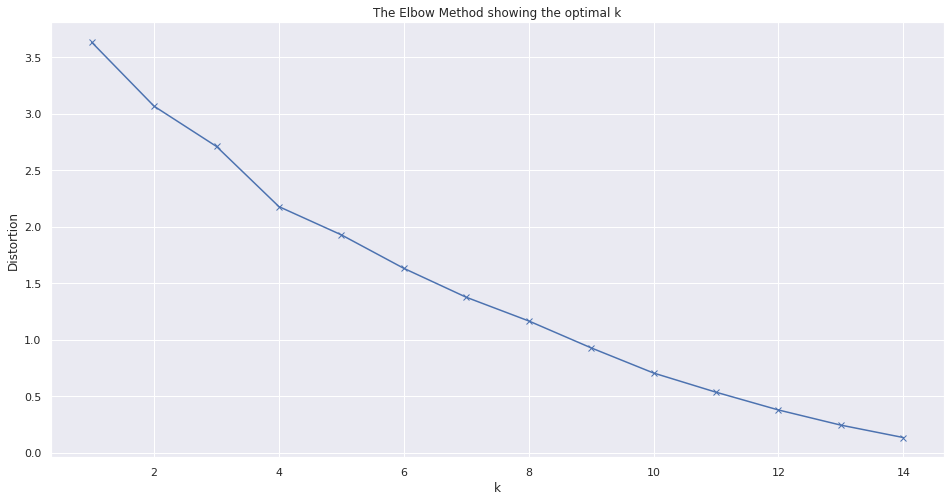

In [31]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#### I choose 5 clusters

In [32]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(north_york_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 2, 2, 0, 2, 2, 2, 1, 3], dtype=int32)

#### Creating a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [33]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

north_york_merged = north_york_data

# merge north_york_grouped with north_york_data to add latitude/longitude for each neighborhood
north_york_merged = north_york_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

north_york_merged.head() # check the last columns!

,Postal code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,0.0,Park,Food & Drink Shop,Fireworks Store,Discount Store,Comfort Food Restaurant,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega
1,M4A,North York,Victoria Village,43.725882,-79.315572,2.0,Coffee Shop,Grocery Store,Hockey Arena,Portuguese Restaurant,Nail Salon,Discount Store,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop
2,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,2.0,Clothing Store,Women's Store,Shoe Store,Boutique,Coffee Shop,Event Space,Furniture / Home Store,Vietnamese Restaurant,Miscellaneous Shop,Accessories Store
3,M3B,North York,Don Mills,43.745906,-79.352188,2.0,Restaurant,Beer Store,Asian Restaurant,Coffee Shop,Japanese Restaurant,Gym,Italian Restaurant,Café,Caribbean Restaurant,Gym / Fitness Center
4,M6B,North York,Glencairn,43.709577,-79.445073,2.0,Japanese Restaurant,Playground,Bakery,Pub,Discount Store,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega


In [0]:
north_york_merged=north_york_merged.dropna().reset_index()

#### Visualizing the resulting clusters

In [35]:
# create map
map_clusters = folium.Map(location=[latitude_north, longitude_north], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(north_york_merged['Latitude'], north_york_merged['Longitude'], north_york_merged['Neighborhood'], north_york_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters